In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data cleaning
=======



In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Get all the distinct data types in frame. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

In [5]:
df.promotion_last_5years.unique()

array([0, 1])

In [6]:
# Everything is in int/float except salary and sales
# Let's see their values to decide how to work on them
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df['sales'] = df['sales'].astype('category')
df['salary'] = df['salary'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index([u'sales', u'salary'], dtype='object')

In [9]:
df[cat_columns] =df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
sales,14999.0,5.870525,2.868786,0.00,4.00,7.00,8.00,9.0
salary,14999.0,1.347290,0.625819,0.00,1.00,1.00,2.00,2.0


In [11]:
df.index

RangeIndex(start=0, stop=14999, step=1)

In [12]:
df.iloc[[2,4]]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2,0.11,0.88,7,272,4,0,1,0,7,2
4,0.37,0.52,2,159,3,0,1,0,7,1


In [13]:
df[['satisfaction_level', 'last_evaluation']].head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [14]:
df.groupby('left').time_spend_company.describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0


In [15]:
grouper = df.groupby('left')

In [16]:
grouper.promotion_last_5years.describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,0.026251,0.159889,0.0,0.0,0.0,0.0,1.0
1,3571.0,0.005321,0.072759,0.0,0.0,0.0,0.0,1.0


In [17]:
df.loc[df.average_montly_hours <= 100, "average_montly_hours"].iloc[:5]

2085    100
2222    100
2262     99
2305     97
2352    100
Name: average_montly_hours, dtype: int64

In [18]:
grouper.average_montly_hours.mean()

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

Data exploration
====

Now that all the data is numeric, let's see the correlation between various columns

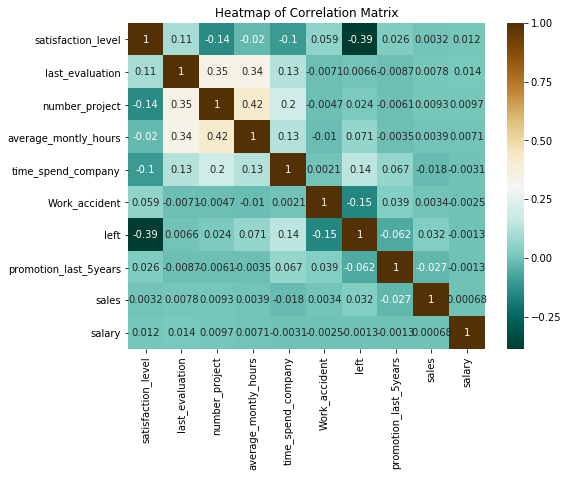

In [19]:
fig = plt.figure(figsize=(8,6))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='BrBG_r',
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.savefig("correlation.png")

#### Correlation Analysis:

* There is a very high psitive correlation between the number of projects and the average monthly hours spent by an employee. This is expected. 
* We also see a high **negative** correlation between the satisfaction level and their leaving. 
* Another evident  feature showing negative correlation with their leaving, is salary. Meaning if the salary is high, they are less likely to leave. 

Prediction of employee attrition
====

In [20]:
# from sklearn.decomposition import PCA
# from sklearn.model_selection import cross_val_score
# from sklearn.feature_selection import RFECV, SelectKBest

# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB, BernoulliNB
# from sklearn.neighbors import KNeighborsClassifier

# classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
#                ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
#                ('AdaBoostClassifier', AdaBoostClassifier()),
#                ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
#                ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
#                ('DecisionTreeClassifier', DecisionTreeClassifier()),
#                ('ExtraTreeClassifier', ExtraTreeClassifier()),
#                ('LogisticRegression', LogisticRegression()),
#                ('GaussianNB', GaussianNB()),
#                ('BernoulliNB', BernoulliNB())
#               ]
# allscores = []


# X, Y = df.drop('left', axis=1), df['left']
# for name, classifier in classifiers:
#     scores = []
#     for i in range(3): 
#         roc = cross_val_score(classifier, X, Y, scoring='roc_auc', cv=150)
#         scores.extend(list(roc))
#     scores = np.array(scores)
#     print(name, scores.mean())
#     new_data = [(name, score) for score in scores]
#     allscores.extend(new_data)

In [21]:
from sklearn.model_selection import train_test_split
X, y = df.drop('left', axis=1), df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier,  export_graphviz
from sklearn import tree

estimator = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
estimator.fit(X_train, y_train)

tree.export_graphviz(estimator, out_file='tree.dot', feature_names=X_train.columns) 
!dot -Tpng tree.dot -o tree.png 

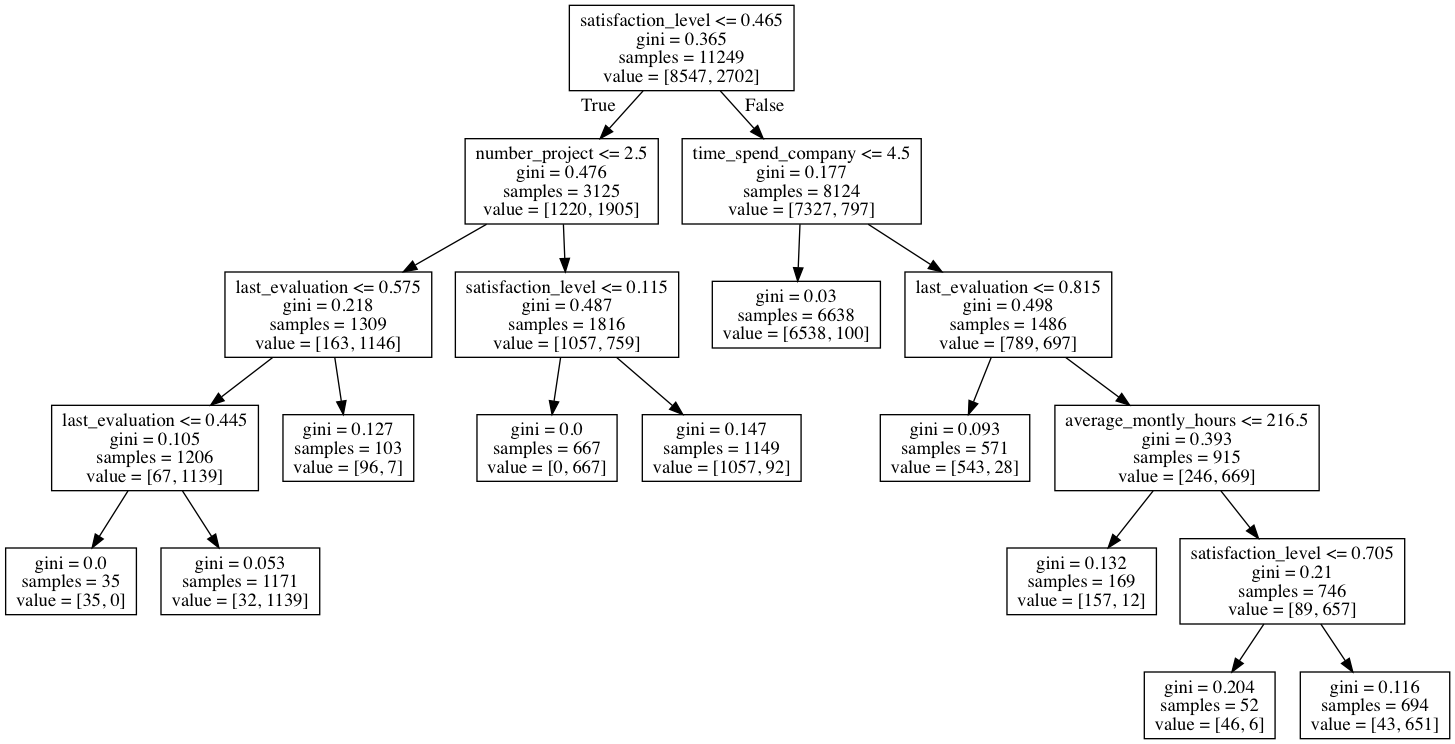

In [23]:
from IPython.display import Image
Image("tree.png")

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X_train, y_train, cv=10)
np.array(scores).mean()

0.97075317268179351

In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada_estimator = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10),
    n_estimators=10,
    learning_rate=1)

ada_estimator.fit(X_train, y_train)
scores = cross_val_score(ada_estimator, X_train, y_train, cv=10)
np.array(scores).mean()

0.98577650767965486

In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_jobs=-1, criterion='entropy')
    

random_forest.fit(X_train, y_train)
scores = cross_val_score(random_forest, X_train, y_train, cv=10)
np.array(scores).mean()

0.98826626619666569

In [27]:
random_forest_gini = RandomForestClassifier(n_jobs=-1, criterion='gini')
    
random_forest_gini.fit(X_train, y_train)
scores = cross_val_score(random_forest_gini, X_train, y_train, cv=10)
np.array(scores).mean()

0.98871039473194422

In [33]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbor = KNeighborsClassifier(n_neighbors=10)

k_neighbor.fit(X_train, y_train)
scores = cross_val_score(k_neighbor, X_train, y_train, cv=10)
np.array(scores).mean()

0.92861532138384795

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)
scores = cross_val_score(logistic_regression, X_train, y_train, cv=10)
np.array(scores).mean()

0.76522499362633245